## Subbredit analyzing 

This project intend to compare two subreddits in a especified period of time by an analytical and behavioral lens.

### Metrics:
These 5 metrics used to demostrate different aspects of posts in subreddits
* ups: number of users who liked the post
* user engagement ratio: This metric aims to demonsterate the ratio of people who likes a post compared to all subscribers of the subreddit
* upvote ratio: ratio of ups to the all number of votes
* number of comments
* title length

# Data Management

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from fitter import Fitter, get_common_distributions

In [2]:
# read the collected csv file
vim = pd.read_csv('./Datasets/vim.csv')
# Somehow normalized the User Engagement Ratio, becasuse the range was too low
vim['User Engagement Ratio'] = vim['User Engagement Ratio'] * (10**2)
vim

,identifier,ups,User Engagement Ratio,upvote ratio,nummber of comments,title length
0,t3_18mv7m7,5,0.003049,0.86,9,62
1,t3_18mc27r,30,0.018295,0.92,10,29
2,t3_18maoch,4,0.002439,0.83,4,76
3,t3_18m44vz,1,0.000610,1.00,0,61
4,t3_18m1c02,4,0.002439,0.76,12,115
...,...,...,...,...,...,...
363,t3_16qk5ao,25,0.015246,0.80,4,32
364,t3_16qemib,3,0.001830,1.00,2,42
365,t3_16qe3lx,3,0.001830,0.71,8,51
366,t3_16q9bvg,22,0.013417,0.92,23,23


In [3]:
# read the collected csv file
emacs = pd.read_csv('./Datasets/emacs.csv')
# I somehow normalized the User Engagement Ratio, becasuse the range was too low
emacs['User Engagement Ratio'] = emacs['User Engagement Ratio'] * (10**2)
emacs

,identifier,ups,User Engagement Ratio,upvote ratio,nummber of comments,title length
0,t3_18xhake,1,0.001458,0.67,4,46
1,t3_18xg50f,13,0.018956,0.85,7,43
2,t3_18xez16,4,0.005833,0.83,0,59
3,t3_18xebux,2,0.002916,1.00,0,35
4,t3_18xd3z2,1,0.001458,0.56,3,53
...,...,...,...,...,...,...
952,t3_170qw6m,6,0.008749,0.88,4,92
953,t3_170p8r9,3,0.004375,0.60,10,26
954,t3_170op6m,5,0.007291,0.86,0,54
955,t3_170obzz,2,0.002916,0.67,0,34


# Distribution Analysis using plots

Three different libraries will be used to demonsterate the distibution of our subreddits
1. matplotlib: to create the histograms and density plots
2. seaborn: to create box plots
3. fitter: to create plots in order to find the best distribution fitted to the subreddit

### Histogram

Create histogram for all 5 metrics in the vim subreddit

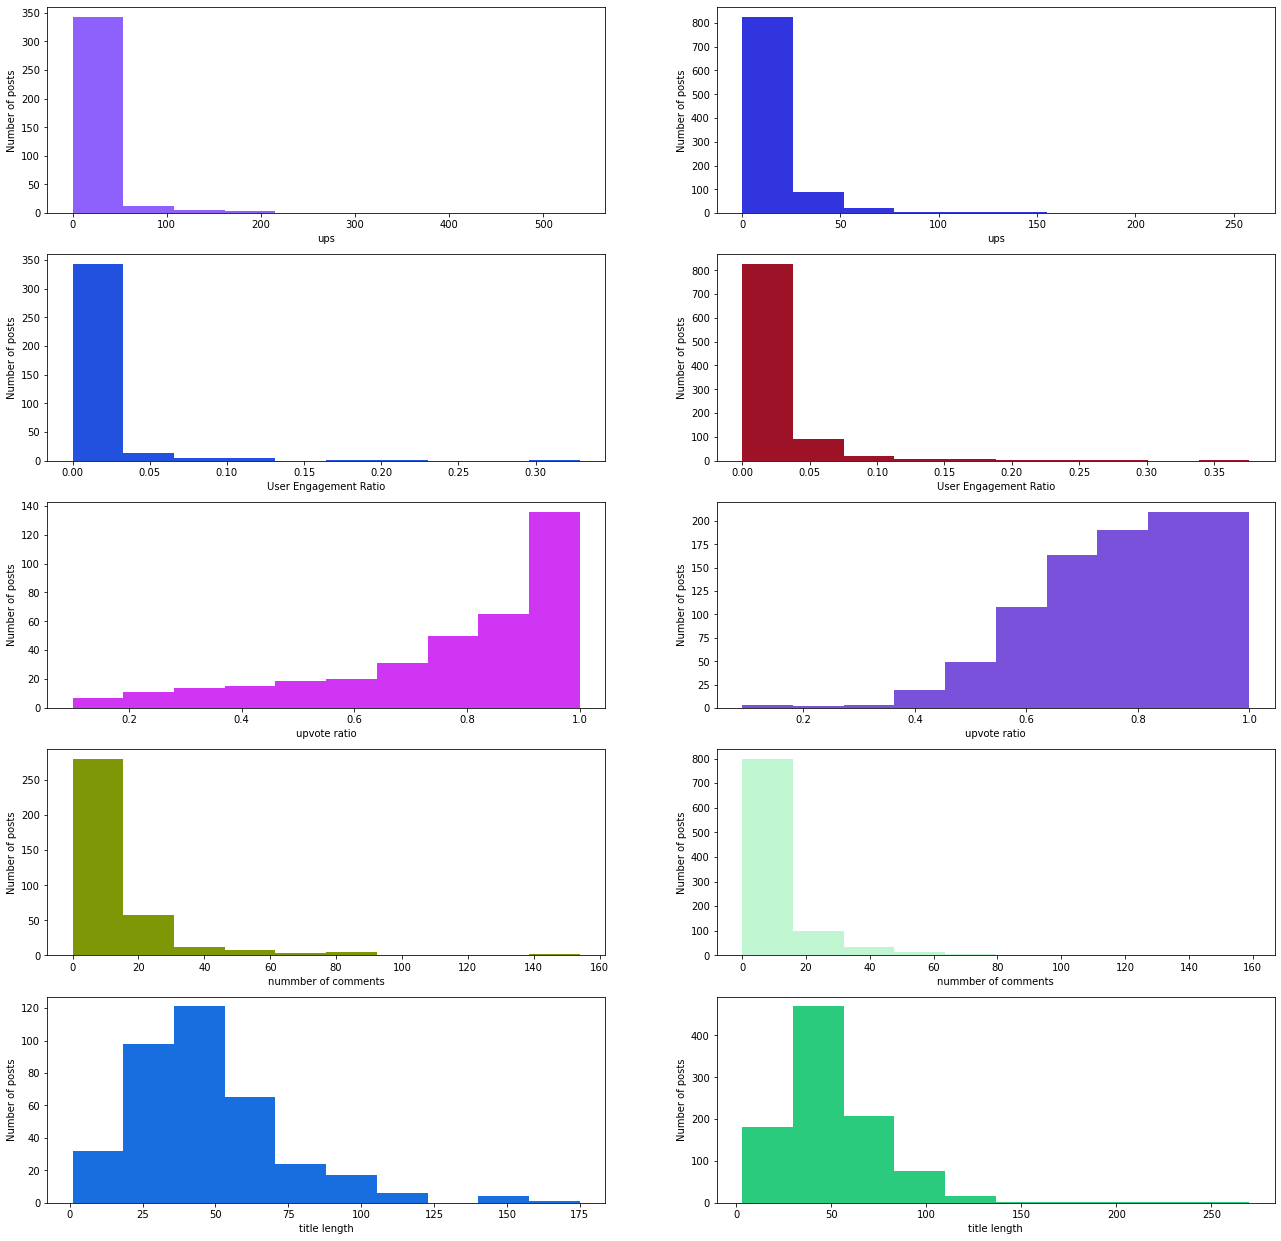

In [10]:
# Create histogram for all 5 metrics in the vim subreddit
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(22, 22))
col_num = 0
row_num = 0

for col in vim.columns[1:]:
    ax[row_num, col_num].set(xlabel= col, ylabel="Number of posts")
    # display plot
    ax[row_num, col_num].hist(vim[col], color = np.random.rand(3,))

    ax[row_num, col_num + 1].set(xlabel= col, ylabel="Number of posts")
    # display plot
    ax[row_num, col_num + 1].hist(emacs[col], color = np.random.rand(3,))
    row_num += 1

#### Density Plot
Create density plots to understand distributions, Modes, and Skewness of each subreddit

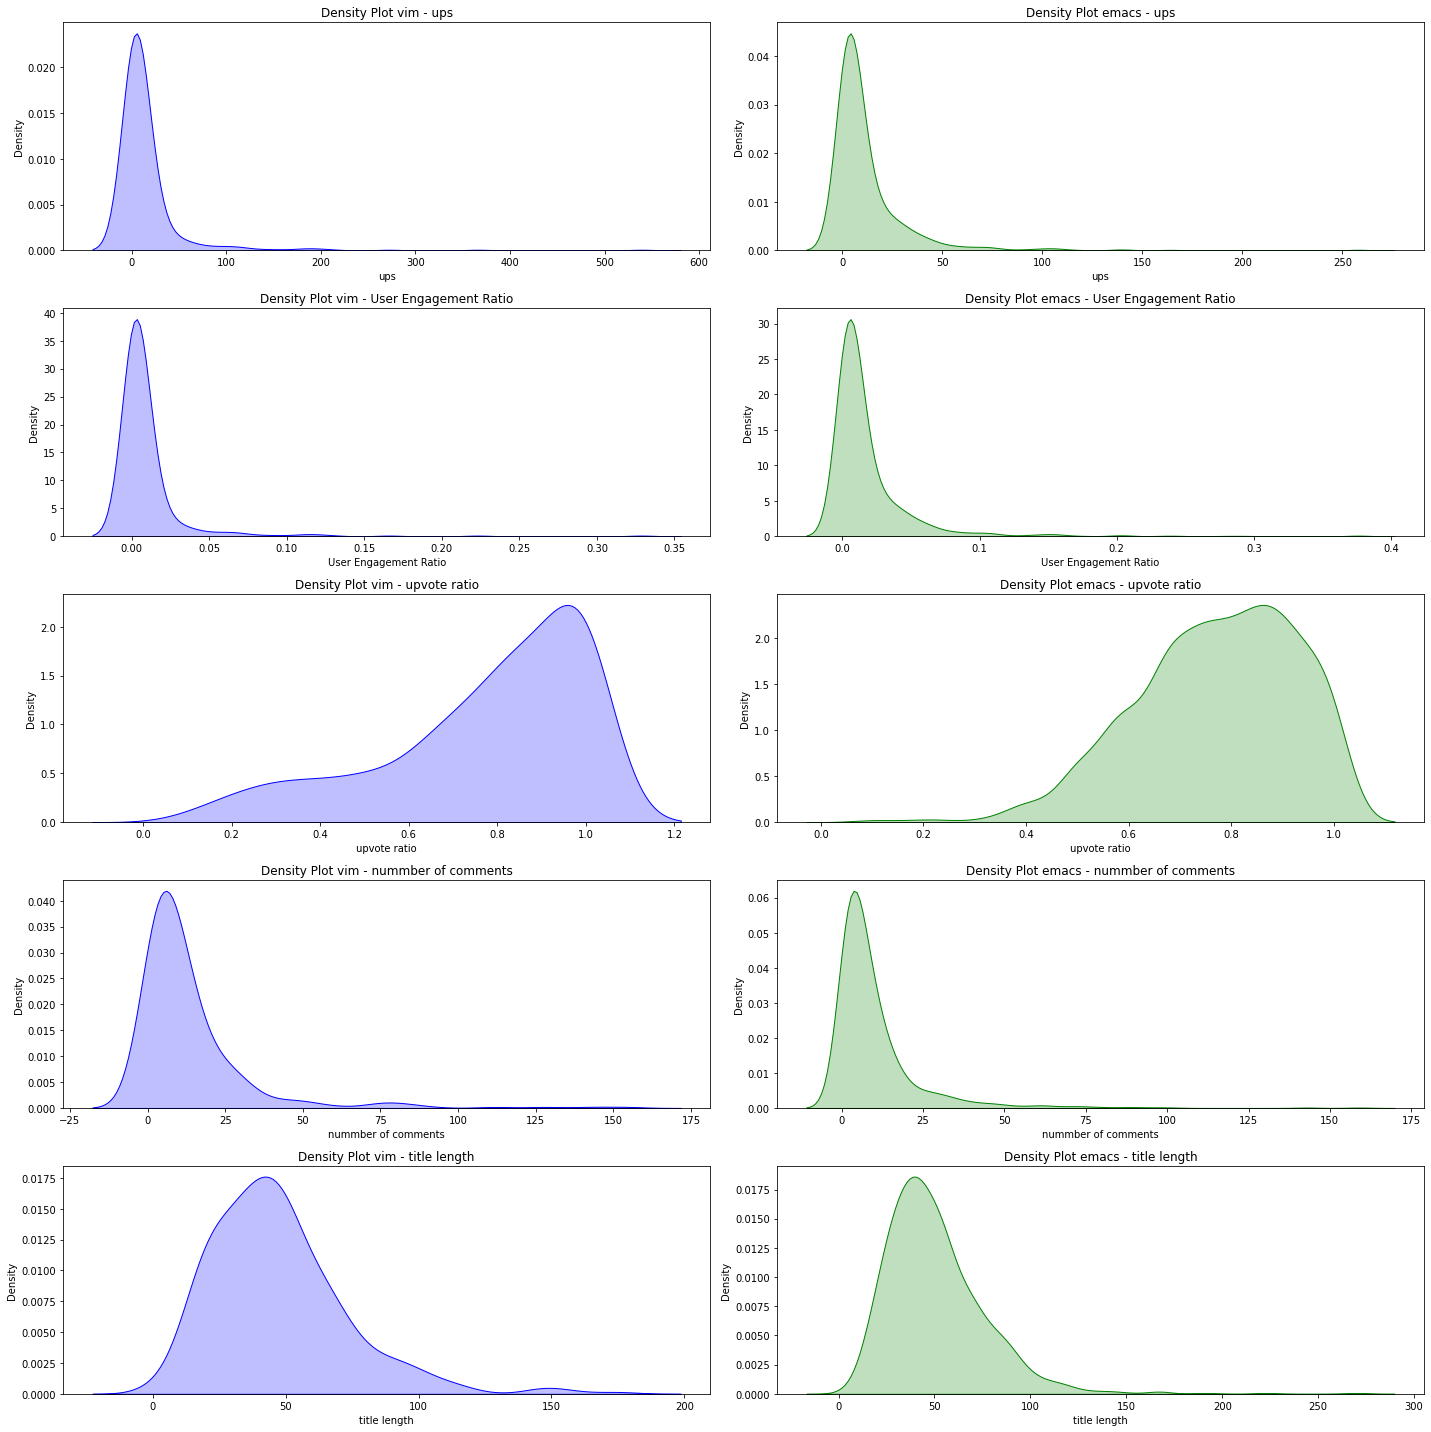

In [17]:
# Create histogram for all 5 metrics in the vim subreddit
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
col_num = 0
row_num = 0
ax = ax.flatten()

for col in vim.columns[1:]:
    sns.kdeplot(vim[col], ax=ax[col_num*2], color='blue', shade=True)
    ax[col_num*2].set_title('Density Plot vim - ' + col)

    sns.kdeplot(emacs[col], ax=ax[col_num  * 2 + 1], color='green', shade=True)
    ax[col_num  * 2 + 1].set_title('Density Plot emacs - ' + col)
    col_num += 1
    
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Box Plot

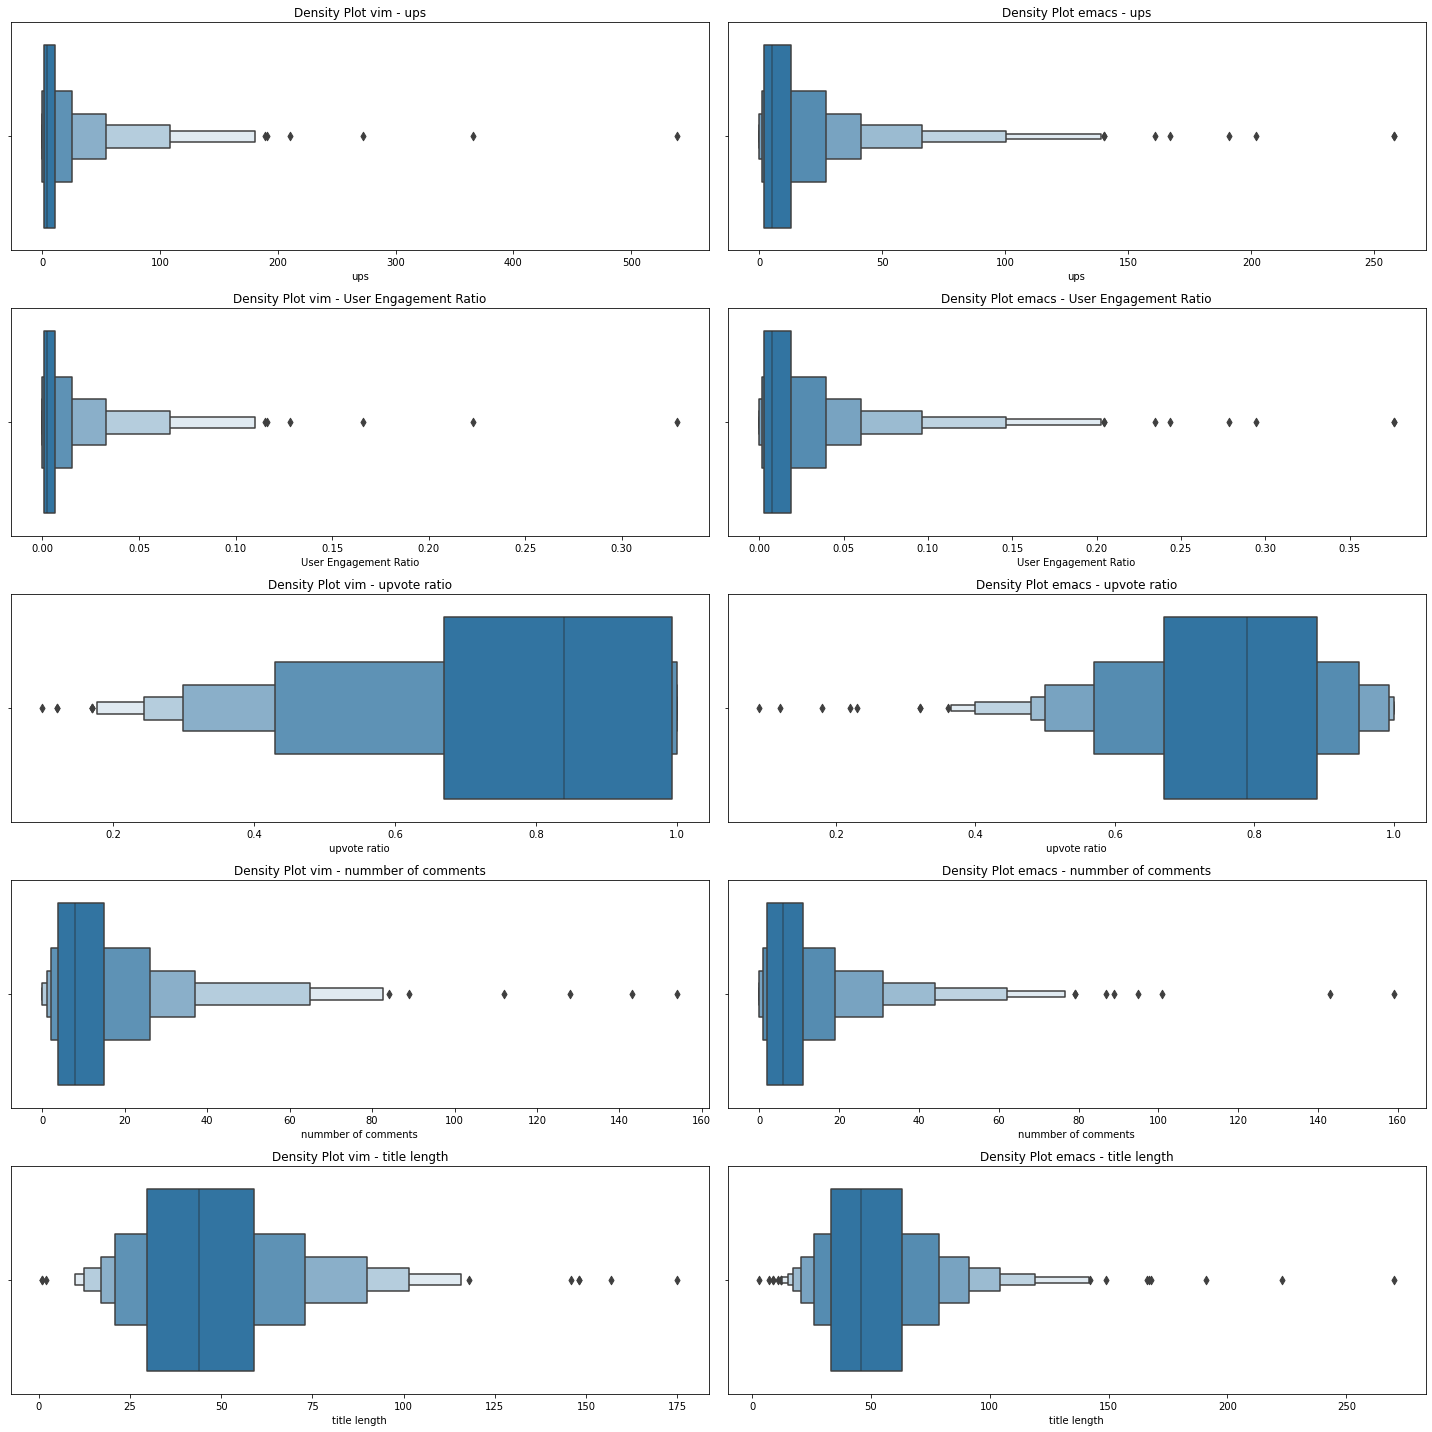

In [20]:
# Create histogram for all 5 metrics in the vim subreddit
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
col_num = 0
row_num = 0
ax = ax.flatten()

for col in vim.columns[1:]:
    sns.boxenplot(x = vim[col], ax=ax[col_num*2])
    ax[col_num*2].set_title('Density Plot vim - ' + col)

    sns.boxenplot(x = emacs[col], ax=ax[col_num  * 2 + 1])
    ax[col_num  * 2 + 1].set_title('Density Plot emacs - ' + col)
    col_num += 1
    
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Fitter library is quite an unfamiliar library for data scientists. However, it is a valuable asset when it comes to detemination of data distribution.<br>
If want to read more about this library use this link: https://fitter.readthedocs.io/en/latest/

"ups" fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

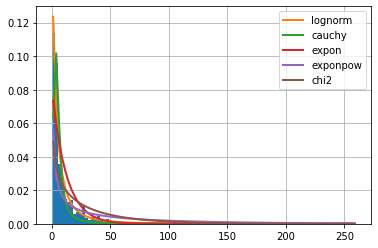

Best: lognorm distribution

"User Engagement Ratio" fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

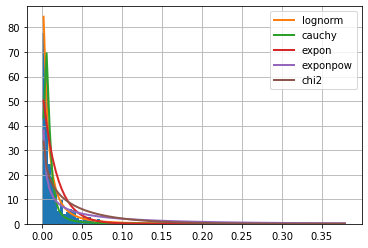

Best: lognorm distribution

"upvote ratio" fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

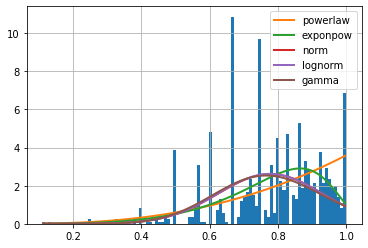

Best: powerlaw distribution

"nummber of comments" fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

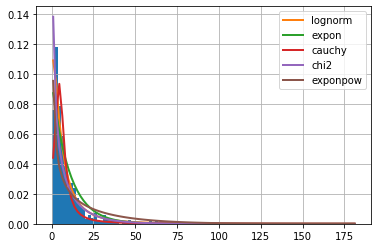

Best: lognorm distribution

"title length" fitting distribution is:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

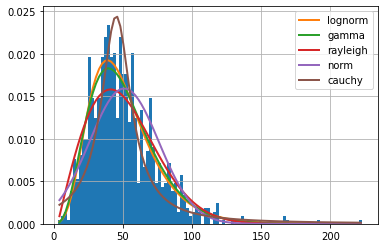

Best: lognorm distribution



In [110]:
# Instructions and information as mentioned above
common_dist = get_common_distributions()
dic = {'Name' : [],
       'Distribution' : []}
for col in emacs.columns[1:]:
    print(f'"{col}" fitting distribution is:')
    f = Fitter(emacs[col],
               distributions= common_dist,
              )
    f.fit(progress=True);
    f.summary()
    plt.show()
    print('Best:', list(f.get_best(method = 'sumsquare_error').keys())[0], 'distribution\n')

# Behavioral Analysis

### Correlation Matrix

In [107]:
def correlation_matrix(df, size=10):
    plt.figure(figsize=(size,size))
    corrMatrix = emacs.corr()
    sns.heatmap(corrMatrix, annot=True, fmt="5.2f")
    plt.show()

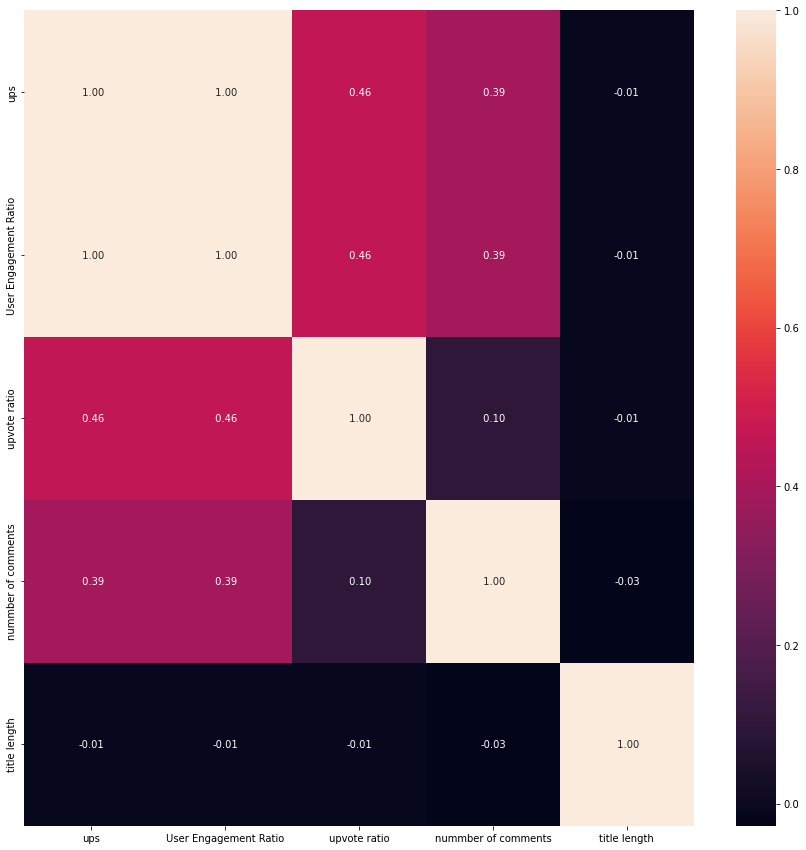

In [134]:
# emacs correlation matrix
correlation_matrix(emacs)


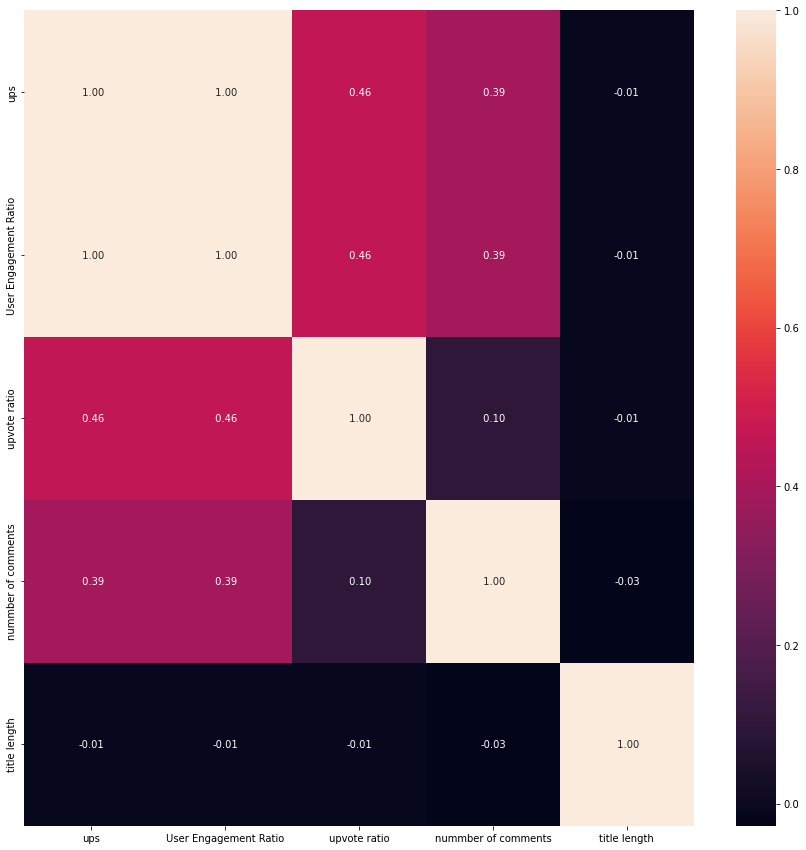

In [133]:
# Vim Correlation Matrix
correlation_matrix(vim)


In [29]:
subreddits = [vim, emacs]
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

for subreddit in subreddits:
    display([name for name, value in globals().items() if value is subreddit][0])
    stats_summary = subreddit.describe().transpose()[['min', 'max', '50%', 'mean', 'std']]
    stats_summary['Variance'] = emacs.var().round(2)
    stats_summary.columns = ['Minimum', 'Maximum', 'Median', 'Mean', 'STD', 'Variance']
    stats_summary = stats_summary.round(2)
    display(stats_summary)

'___'

,Minimum,Maximum,Median,Mean,STD,Variance
ups,0.0,539.00,4.00,15.96,45.23,566.17
User Engagement Ratio,0.0,0.33,0.00,0.01,0.03,0.00
upvote ratio,0.1,1.00,0.84,0.77,0.23,0.02
nummber of comments,0.0,154.00,8.00,13.47,19.26,205.08
title length,1.0,175.00,44.00,47.12,25.70,680.64


'__'

,Minimum,Maximum,Median,Mean,STD,Variance
ups,0.00,258.00,5.00,12.61,23.79,566.17
User Engagement Ratio,0.00,0.38,0.01,0.02,0.03,0.00
upvote ratio,0.09,1.00,0.79,0.77,0.16,0.02
nummber of comments,0.00,159.00,6.00,9.98,14.32,205.08
title length,3.00,270.00,46.00,50.70,26.09,680.64
